# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
city_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        city_count = 0

    # Create endpoint URL with each city
    url_city = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (city_count, set_count, city))

    # Add 1 to the record count
    city_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_request = requests.get(url_city).json()
        
        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_request["coord"]["lat"]
        city_lng = city_request["coord"]["lon"]
        city_max_temp = city_request["main"]["temp_max"]
        city_humidity = city_request["main"]["humidity"]
        city_clouds = city_request["clouds"]["all"]
        city_wind = city_request["wind"]["speed"]
        city_country = city_request["sys"]["country"]
        city_date = city_request["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | mehamn
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | atar
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | east london
Processing Record 9 of Set 1 | amderma
City not found. Skipping...
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | hamilton
Processing Record 13 of Set 1 | katherine
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | leningradskiy
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | boyuibe
Processing Record 18 of Set 1 | hamza
Processing Record 19 of Set 1 | saint george
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | longyearbyen
Processing Record 2

Processing Record 35 of Set 4 | aksay
Processing Record 36 of Set 4 | kabinda
Processing Record 37 of Set 4 | darnah
Processing Record 38 of Set 4 | lavumisa
Processing Record 39 of Set 4 | caetite
Processing Record 40 of Set 4 | kaeo
Processing Record 41 of Set 4 | howard springs
Processing Record 42 of Set 4 | mantua
Processing Record 43 of Set 4 | gladstone
Processing Record 44 of Set 4 | cidreira
Processing Record 45 of Set 4 | manikpur
Processing Record 46 of Set 4 | bambous virieux
Processing Record 47 of Set 4 | saint john
Processing Record 48 of Set 4 | anito
Processing Record 49 of Set 4 | bur gabo
City not found. Skipping...
Processing Record 0 of Set 5 | palana
Processing Record 1 of Set 5 | esperance
Processing Record 2 of Set 5 | airai
Processing Record 3 of Set 5 | cascais
Processing Record 4 of Set 5 | lorengau
Processing Record 5 of Set 5 | bengkulu
City not found. Skipping...
Processing Record 6 of Set 5 | yertsevo
Processing Record 7 of Set 5 | tiksi
Processing Record

Processing Record 20 of Set 8 | sambava
Processing Record 21 of Set 8 | sterling
Processing Record 22 of Set 8 | ballina
Processing Record 23 of Set 8 | kirakira
Processing Record 24 of Set 8 | champerico
Processing Record 25 of Set 8 | meadow lake
Processing Record 26 of Set 8 | marrakesh
Processing Record 27 of Set 8 | leh
Processing Record 28 of Set 8 | anadyr
Processing Record 29 of Set 8 | volokonovka
Processing Record 30 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 31 of Set 8 | quelimane
Processing Record 32 of Set 8 | totma
Processing Record 33 of Set 8 | zacualpan
Processing Record 34 of Set 8 | faanui
Processing Record 35 of Set 8 | coolidge
Processing Record 36 of Set 8 | auki
Processing Record 37 of Set 8 | jumla
Processing Record 38 of Set 8 | scarborough
Processing Record 39 of Set 8 | bakel
Processing Record 40 of Set 8 | los llanos de aridane
Processing Record 41 of Set 8 | barentu
Processing Record 42 of Set 8 | urucui
Processing Record 43 of Set 

Processing Record 6 of Set 12 | trairi
Processing Record 7 of Set 12 | verkhoyansk
Processing Record 8 of Set 12 | rancho palos verdes
Processing Record 9 of Set 12 | pontes e lacerda
Processing Record 10 of Set 12 | ramsgate
Processing Record 11 of Set 12 | seddon
Processing Record 12 of Set 12 | ijaki
City not found. Skipping...
Processing Record 13 of Set 12 | viligili
City not found. Skipping...
Processing Record 14 of Set 12 | nang rong
Processing Record 15 of Set 12 | muana
Processing Record 16 of Set 12 | mayo
Processing Record 17 of Set 12 | muros
Processing Record 18 of Set 12 | padang
Processing Record 19 of Set 12 | karkaralinsk
City not found. Skipping...
Processing Record 20 of Set 12 | ngunguru
Processing Record 21 of Set 12 | winslow
Processing Record 22 of Set 12 | mudanjiang
Processing Record 23 of Set 12 | mirador
Processing Record 24 of Set 12 | grand centre
City not found. Skipping...
Processing Record 25 of Set 12 | araguacu
City not found. Skipping...
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          553
Cloudiness    553
Country       553
Date          553
Humidity      553
Lat           553
Lng           553
Max Temp      553
Wind Speed    553
dtype: int64

In [8]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bredasdorp,89,ZA,1561852864,81,-34.53,20.04,50.00,1.12
1,mehamn,22,NO,1561852869,92,71.03,27.85,38.73,22.62
2,rikitea,100,PF,1561852872,68,-23.12,-134.97,70.47,12.48
3,atar,22,MR,1561852872,14,20.52,-13.05,94.03,14.47
4,mar del plata,23,AR,1561852596,60,-46.43,-67.52,31.93,13.91


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

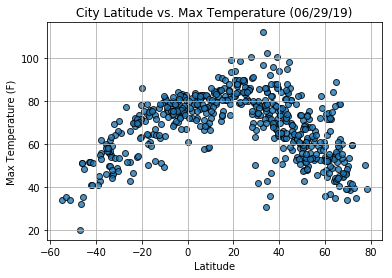

In [9]:
# Scatter plot latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

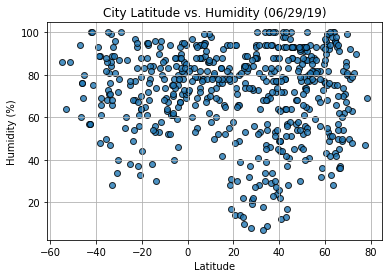

In [10]:
# Scatter plot latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude vs. Cloudiness Plot

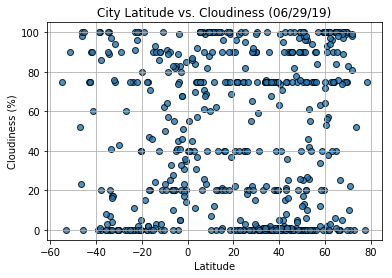

In [11]:
# Scatter plot latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

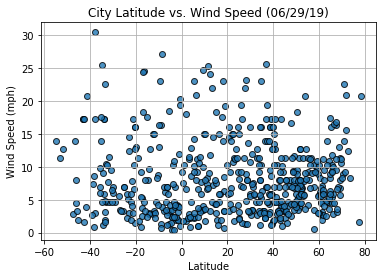

In [12]:
# Scatter plot latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()